A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

In [9]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from jhu_helpers import *

In [3]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [4]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [5]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,China,Italy,Iran,Spain,Germany,"Korea, South",France,US,Switzerland,United Kingdom,Netherlands,Norway,Austria,Belgium,Sweden,Denmark,Japan,Cruise Ship,Malaysia
Date,,,,,,,,,,,,,,,,,,,
2020-03-13,80945,17660,11364,5232,3675,7979,3678,2179,1139,802,804,996,504,559,814,804,701,696,197
2020-03-14,80977,21157,12729,6391,4585,8086,4487,2727,1359,1144,960,1090,655,689,961,836,773,696,238
2020-03-15,81003,24747,13938,7798,5795,8162,4523,3499,2200,1145,1136,1221,860,886,1022,875,839,696,428
2020-03-16,81033,27980,14991,9942,7272,8236,6668,4632,2200,1551,1414,1333,1018,1058,1103,932,825,696,566
2020-03-17,81058,31506,16169,11748,9257,8320,7699,6421,2700,1960,1708,1463,1332,1243,1190,1024,878,696,673


In [6]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    'Singapore', 
    'US',
    'France',
    'Germany',
]

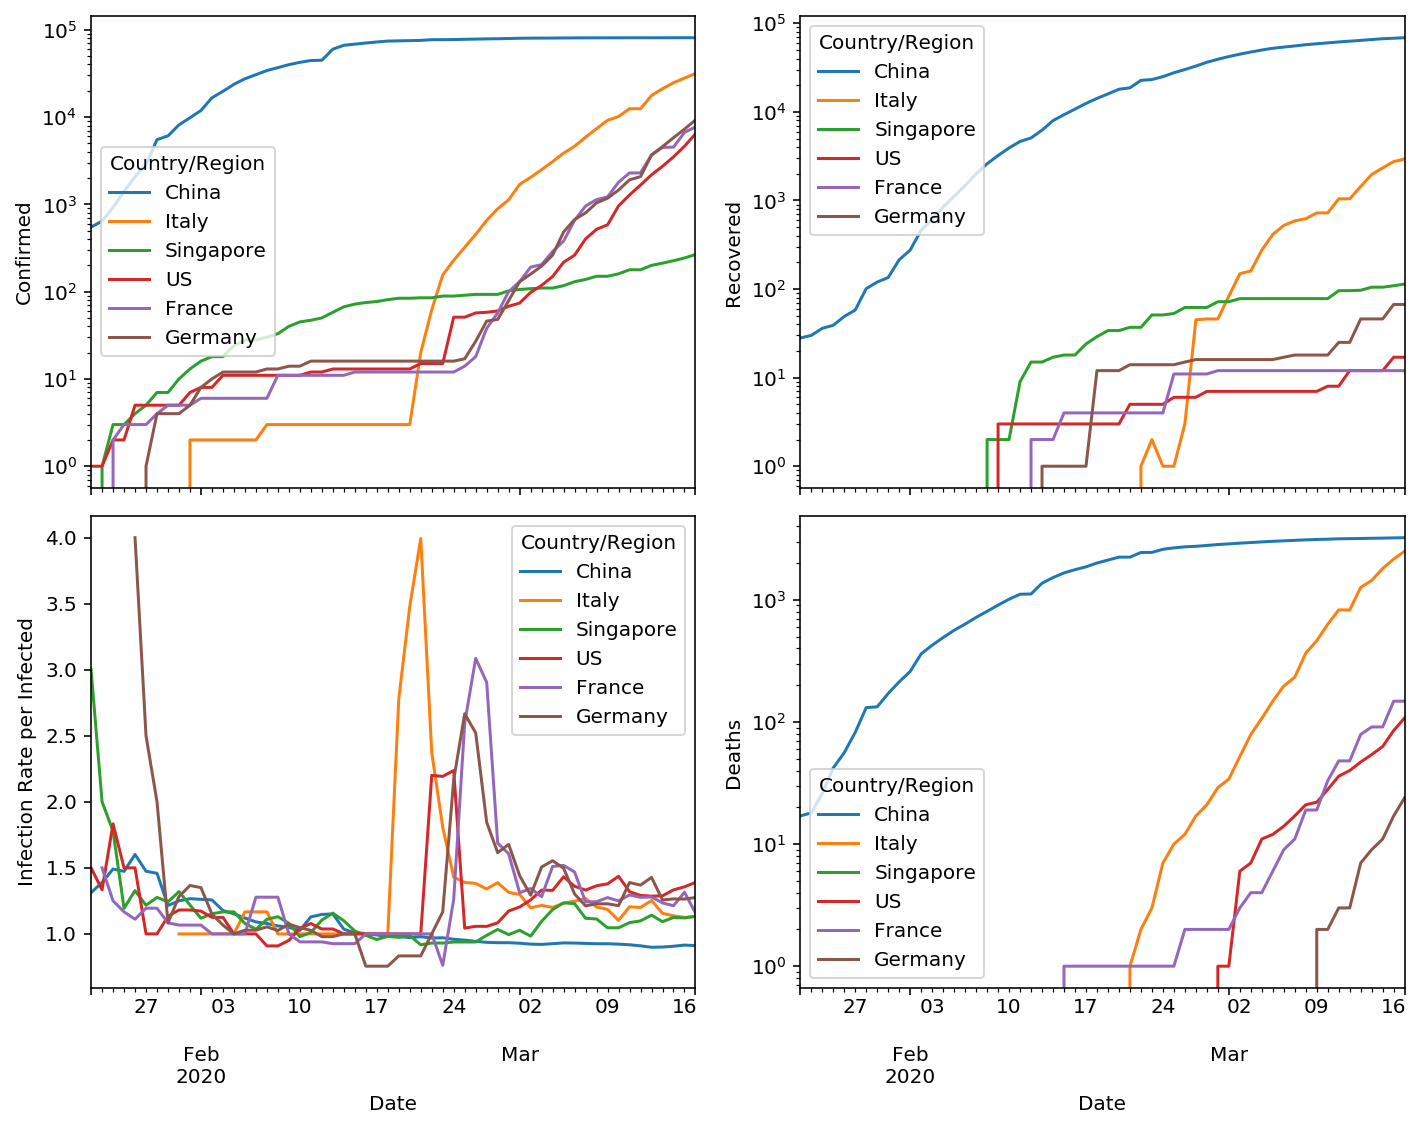

In [10]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed')

smooth_rate_d = 3
jhu.infection_rate[plot_countries].rolling(smooth_rate_d, center=True, min_periods=1).mean().plot(ax=ax1[1,0], logy=False)
ax1[1,0].set_ylabel('Infection Rate per Infected')

jhu.recovered[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Recovered')

jhu.deaths[plot_countries].plot(ax=ax1[1,1], logy=True)
ax1[1,1].set_ylabel('Deaths')

fig1.tight_layout()

In [8]:
# save the above figure
#fig1.savefig('sars-covid-19_timeseries.png')